In [1]:
import pandas as pd
import spacy
import numpy as np

nlp = spacy.load('en_core_web_sm')

In [133]:
corpus_df = pd.read_csv("./Files/text_as_tokens_with_freqs.csv")
corpus_df.head()

,word,frequency
0,the,64020
1,and,51696
2,of,34667
3,to,13580
4,that,12912


In [134]:
def word_properties(x):
    analyzer = nlp(x)
    token = analyzer[0]
    return token.pos_, token.tag_, token.shape_

In [135]:
corpus_df["POS"], corpus_df["tag"], corpus_df["shape"], = zip(*corpus_df.word.map(word_properties))

In [136]:
def standard_normalize(series):
    s_mean = series.mean()
    sigma = series.std()
    return series.apply(lambda x: (x - s_mean) / sigma)


def min_max_normalize(series):
    s_min = series.min()
    s_max = series.max()
    return series.apply(lambda x: (x - s_min) / (s_max - s_min))


# def mean_normalize(series: pd.Series) -> pd.Series:
#     s_min = series.min()
#     s_max = series.max()
#     s_mean = series.mean()
#     sigma = series.std()
#     return standard_normalize(series.apply(lambda x: (x - s_mean) / (sigma ** 2 * (s_max - s_min))))

corpus_df["frequency"] = standard_normalize(corpus_df["frequency"])
corpus_df.head()

,word,frequency,POS,tag,shape
0,the,45.186141,PRON,DT,xxx
1,and,36.466541,CCONJ,CC,xxx
2,of,24.418013,ADP,IN,xx
3,to,9.498329,ADP,IN,xx
4,that,9.025699,PRON,DT,xxxx


In [137]:
corpus_df.tail()

,word,frequency,POS,tag,shape
4995,mankind,-0.105683,NOUN,NN,xxxx
4996,kirjatharba,-0.105683,NOUN,NN,xxxx
4997,appearing,-0.105683,VERB,VBG,xxxx
4998,talmai,-0.105683,PROPN,NNP,xxxx
4999,abib,-0.105683,PROPN,NNP,xxxx


<AxesSubplot:xlabel='word', ylabel='frequency'>

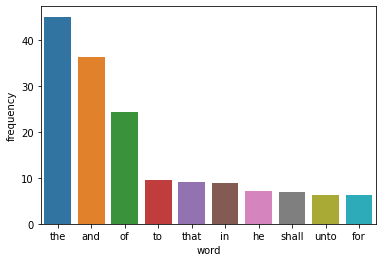

In [139]:
import seaborn as sns

sns.barplot(x=corpus_df["word"][:10], y=corpus_df["frequency"][:10])

In [140]:
corpus_df = corpus_df.join(pd.get_dummies(corpus_df["POS"], prefix="POS", drop_first=True))
corpus_df = corpus_df.join(pd.get_dummies(corpus_df["tag"], prefix="tag", drop_first=True))
corpus_df = corpus_df.join(pd.get_dummies(corpus_df["shape"], prefix="shape", drop_first=True))
corpus_df.head()

,word,frequency,POS,tag,shape,POS_ADP,POS_ADV,POS_AUX,POS_CCONJ,POS_DET,...,tag_WDT,tag_WP,tag_WP$,tag_WRB,shape_ddd,shape_dddd,shape_x,shape_xx,shape_xxx,shape_xxxx
0,the,45.186141,PRON,DT,xxx,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,and,36.466541,CCONJ,CC,xxx,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,of,24.418013,ADP,IN,xx,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,to,9.498329,ADP,IN,xx,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,that,9.025699,PRON,DT,xxxx,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [141]:
from sklearn.decomposition import PCA

pca_corpus = PCA(n_components=3)
principle_components = pd.DataFrame(
    data=pca_corpus.fit_transform(corpus_df.drop(columns=["word", "POS", "tag", "shape"])),
    columns=["PC1", "PC2", "PC3"])
principle_components["PC1"] = min_max_normalize(principle_components["PC1"])
principle_components["PC2"] = min_max_normalize(principle_components["PC2"])
principle_components["PC3"] = min_max_normalize(principle_components["PC3"])
corpus_df = corpus_df.join(principle_components)
corpus_df.head()

,word,frequency,POS,tag,shape,POS_ADP,POS_ADV,POS_AUX,POS_CCONJ,POS_DET,...,tag_WRB,shape_ddd,shape_dddd,shape_x,shape_xx,shape_xxx,shape_xxxx,PC1,PC2,PC3
0,the,45.186141,PRON,DT,xxx,0,0,0,0,0,...,0,0,0,0,0,1,0,1.000000,1.000000,0.488819
1,and,36.466541,CCONJ,CC,xxx,0,0,0,1,0,...,0,0,0,0,0,1,0,0.807684,0.851917,0.469756
2,of,24.418013,ADP,IN,xx,1,0,0,0,0,...,0,0,0,0,1,0,0,0.542797,0.639507,0.441416
3,to,9.498329,ADP,IN,xx,1,0,0,0,0,...,0,0,0,0,1,0,0,0.214689,0.382432,0.408545
4,that,9.025699,PRON,DT,xxxx,0,0,0,0,0,...,0,0,0,0,0,0,1,0.203046,0.408997,0.412796


In [149]:
corpus_df.sort_values("PC2", ascending=False).head()

,word,frequency,POS,tag,shape,POS_ADP,POS_ADV,POS_AUX,POS_CCONJ,POS_DET,...,tag_WRB,shape_ddd,shape_dddd,shape_x,shape_xx,shape_xxx,shape_xxxx,PC1,PC2,PC3
0,the,45.186141,PRON,DT,xxx,0,0,0,0,0,...,0,0,0,0,0,1,0,1.000000,1.000000,0.488819
23,thou,3.763091,NOUN,NN,xxxx,0,0,0,0,0,...,0,0,0,0,0,0,1,0.085080,0.939568,0.417719
53,king,1.486967,NOUN,NN,xxxx,0,0,0,0,0,...,0,0,0,0,0,0,1,0.035025,0.900349,0.412704
70,land,1.105608,NOUN,NN,xxxx,0,0,0,0,0,...,0,0,0,0,0,0,1,0.026638,0.893778,0.411864
75,shalt,1.033440,NOUN,NN,xxxx,0,0,0,0,0,...,0,0,0,0,0,0,1,0.025051,0.892535,0.411705


In [142]:
print('Explained variation per principal component: {}'.format(pca_corpus.explained_variance_ratio_))

Explained variation per principal component: [0.36861872 0.17539478 0.11226243]


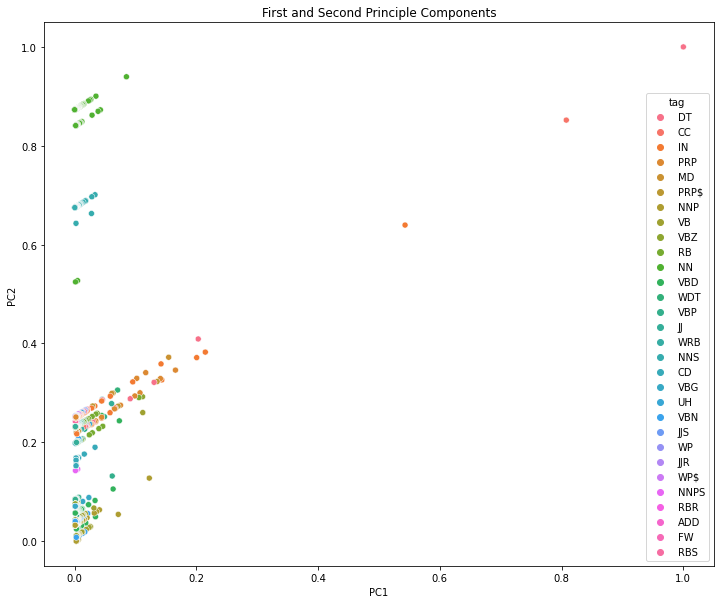

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.scatterplot(x="PC1", y="PC2", data=corpus_df, hue="tag")
plt.title("First and Second Principle Components")
plt.show()

In [154]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [161]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
corpus_df["tag_labels"] = le.fit_transform(corpus_df["tag"])
corpus_df.head()

,word,frequency,POS,tag,shape,POS_ADP,POS_ADV,POS_AUX,POS_CCONJ,POS_DET,...,shape_ddd,shape_dddd,shape_x,shape_xx,shape_xxx,shape_xxxx,PC1,PC2,PC3,tag_labels
0,the,45.186141,PRON,DT,xxx,0,0,0,0,0,...,0,0,0,0,1,0,1.000000,1.000000,0.488819,3
1,and,36.466541,CCONJ,CC,xxx,0,0,0,1,0,...,0,0,0,0,1,0,0.807684,0.851917,0.469756,1
2,of,24.418013,ADP,IN,xx,1,0,0,0,0,...,0,0,0,1,0,0,0.542797,0.639507,0.441416,5
3,to,9.498329,ADP,IN,xx,1,0,0,0,0,...,0,0,0,1,0,0,0.214689,0.382432,0.408545,5
4,that,9.025699,PRON,DT,xxxx,0,0,0,0,0,...,0,0,0,0,0,1,0.203046,0.408997,0.412796,3


In [173]:
import plotly.graph_objs as go

x = corpus_df["PC1"]
y = corpus_df["PC2"]
z = corpus_df["PC3"]
color = corpus_df["tag_labels"]

fig = go.Figure([
    go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=3.5,
            color=color,
            colorscale='Jet',
            opacity=0.8
        ),
        name="Principle Components of Tokens"
    )
])

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    title="Plot Title"
)
fig.show()